# University Ranking EDA

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

# for visulas
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Import and Load file
df = pd.read_csv(r'C:\Users\USER\Documents\Data Project\University Ranking\DATASET\World University Rankings 2023.csv')

# Data Exploration

In [69]:
df.head()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio,OverAll Score Min,OverAll Score Max
0,1,University of Oxford,United Kingdom,20965.0,10.6,42%,92.3,99.7,99.0,74.9,96.2,48.0,52.0,96.4,96.4
1,2,Harvard University,United States,21887.0,9.6,25%,94.8,99.0,99.3,49.5,80.5,50.0,50.0,95.2,95.2
2,3,University of Cambridge,United Kingdom,20185.0,11.3,39%,90.9,99.5,97.0,54.2,95.8,47.0,53.0,94.8,94.8
3,3,Stanford University,United States,16164.0,7.1,24%,94.2,96.7,99.8,65.0,79.8,46.0,54.0,94.8,94.8
4,5,Massachusetts Institute of Technology,United States,11415.0,8.2,33%,90.7,93.6,99.8,90.9,89.3,40.0,60.0,94.2,94.2


In [7]:
df.tail()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
2336,-,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,34.0–39.2,24.1,15.5,61.5,37.9,76.8
2337,-,University of Windsor,NaN,NaN,NaN,NaN,NaN,34.0–39.2,35.1,29.4,34.5,44.2,88.7
2338,-,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,34.0–39.2,18.2,14.3,68.8,37.3,72.0
2339,-,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,34.0–39.2,26.4,26.7,52.8,52.1,47.6
2340,-,Xi’an Jiaotong-Liverpool University,NaN,NaN,NaN,NaN,NaN,34.0–39.2,17.8,14.8,68.2,38.2,72.4


In [71]:
# Check columns
df.columns

Index(['University Rank', 'Name of University', 'Location', 'No of student',
       'No of student per staff', 'International Student', 'Teaching Score',
       'Research Score', 'Citations Score', 'Industry Income Score',
       'International Outlook Score', 'Female Ratio', 'Male Ratio',
       'OverAll Score Min', 'OverAll Score Max'],
      dtype='object')

In [72]:
# info of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2312 entries, 0 to 2340
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              2312 non-null   object 
 1   Name of University           2312 non-null   object 
 2   Location                     2312 non-null   object 
 3   No of student                2312 non-null   float64
 4   No of student per staff      2312 non-null   float64
 5   International Student        2209 non-null   object 
 6   Teaching Score               2312 non-null   float64
 7   Research Score               2312 non-null   float64
 8   Citations Score              2312 non-null   float64
 9   Industry Income Score        2312 non-null   float64
 10  International Outlook Score  2312 non-null   float64
 11  Female Ratio                 2128 non-null   float64
 12  Male Ratio                   2128 non-null   float64
 13  OverAll Score Min 

In [10]:
# shape of the data
df.shape

(2341, 13)

# Data Preprocessing

- Check for Missing values
- Check for Duplicates
- Data type inconsistencies (e.g., converting percentage strings to floats, and number strings with commas to integers)
- Replace missing values or NaN in columns like 'Name of University' and 'Location' with 'Unknown'.
- Replace NaN values and remove commas from the 'No of Students' column. Convert the data type to float.
- Replace missing values or NaN with the mean in each column, such as 'No of Student staff', 'Teaching score', 'Research score', 'Citations score', 'Industry income score', and 'International outlook score.
- Separate male and female ratios and leave them as integers.
- The 'Overall Score' column contains both ranged values and single numeric values. To address this, extract the minimum and maximum values from the 'Overall Score' column and store them as 'Overall Score Min' and 'Overall Score Max' columns, respectively.
- Replace missing values with NaN in the 'International student' column and convert the string to float.

In [46]:
# Check for missing values
df.isnull().sum()

University Rank                  0
Name of University               0
Location                         0
No of student                    0
No of student per staff          0
International Student          132
Teaching Score                   0
Research Score                   0
Citations Score                  0
Industry Income Score            0
International Outlook Score      0
Female Ratio                   213
Male Ratio                     213
OverAll Score Min              542
OverAll Score Max              542
dtype: int64

In [47]:
# Check for duplicates
df.duplicated().sum()

29

**Missing Values:**
- Several columns have missing values. Notably, many of the score-related columns have 542 missing values each.
**Duplicates:**
- There are 29 duplicate rows in the dataset.

**Proposed Actions:**
- Remove the duplicate rows.
- Handle missing values. For categorical values like Name of University and Location, we can label missing values as 'Unknown'. For numerical columns, we might consider imputation or removal.
- Convert data types where necessary (e.g., percentage strings to floats, number strings with commas to integers).

In [50]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill missing values for categorical columns with 'Unknown'
df['Name of University'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)

# Check the shape of the dataframe after removing duplicates and filling missing values
df.shape

(2312, 15)

**Data type inconsistencies:**

- Convert percentage strings to floats (e.g., "42%" to 0.42).
- Convert number strings with commas to integers (e.g., "20,965" to 20965).
- Convert score columns to floats.

In [58]:
# Redefine the list of score columns
score_columns = ['OverAll Score Max', 'OverAll Score Min','Teaching Score', 'Research Score', 'Citations Score', 
                 'Industry Income Score', 'International Outlook Score']

# Convert score columns to floats
for column in score_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Check the data types and first few rows after conversions
df.dtypes, df.head()


(University Rank                 object
 Name of University              object
 Location                        object
 No of student                  float64
 No of student per staff        float64
 International Student           object
 Teaching Score                 float64
 Research Score                 float64
 Citations Score                float64
 Industry Income Score          float64
 International Outlook Score    float64
 Female Ratio                   float64
 Male Ratio                     float64
 OverAll Score Min              float64
 OverAll Score Max              float64
 dtype: object,
   University Rank                     Name of University        Location  \
 0               1                   University of Oxford  United Kingdom   
 1               2                     Harvard University   United States   
 2               3                University of Cambridge  United Kingdom   
 3               3                    Stanford University   United States   


Correlation Heatmap: A heatmap to show the correlation between the different score metrics.
Distribution of International Students: A histogram to show the distribution of the percentage of international students across universities.

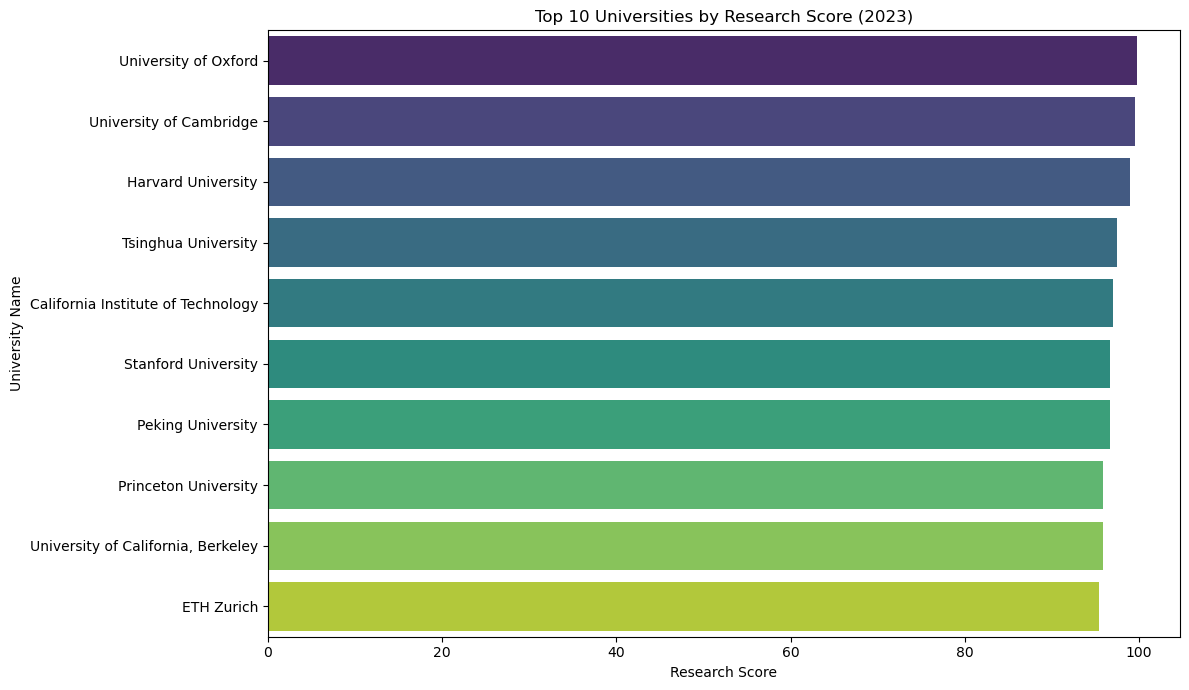

In [65]:
# Top 10 Universities by Research Score
top_10_universities = df.sort_values(by='Research Score', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_universities, y='Name of University', x='Research Score', palette='viridis')
plt.title('Top 10 Universities by Research Score (2023)')
plt.xlabel('Research Score')
plt.ylabel('University Name')
plt.tight_layout()
plt.show()


- A bar chart showcasing the top 10 universities based on their Research scores. This gives a clear picture of which universities are leading in 2023 based on their Research Score .

- The International Student column values are now floats representing percentages (e.g., 0.42 for 42%).
- The No of student column values are now floats.
- The score columns have been converted to floats.

In [74]:
# Replace missing values or NaN in 'Name of University' and 'Location' columns with 'Unknown'
df['Name of University'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)

# Display the updated DataFrame
print(df.tail())


     University Rank                   Name of University Location  \
2336               -   University of the West of Scotland  Unknown   
2337               -                University of Windsor  Unknown   
2338               -          University of Wolverhampton  Unknown   
2339               -              University of Wuppertal  Unknown   
2340               -  Xi’an Jiaotong-Liverpool University  Unknown   

      No of student  No of student per staff International Student  \
2336            0.0                19.000408                   NaN   
2337            0.0                19.000408                   NaN   
2338            0.0                19.000408                   NaN   
2339            0.0                19.000408                   NaN   
2340            0.0                19.000408                   NaN   

      Teaching Score  Research Score  Citations Score  Industry Income Score  \
2336            24.1            15.5             61.5                   37.9  

In [20]:
df.tail()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
2336,-,University of the West of Scotland,Unknown,0.0,NaN,NaN,NaN,34.0–39.2,24.1,15.5,61.5,37.9,76.8
2337,-,University of Windsor,Unknown,0.0,NaN,NaN,NaN,34.0–39.2,35.1,29.4,34.5,44.2,88.7
2338,-,University of Wolverhampton,Unknown,0.0,NaN,NaN,NaN,34.0–39.2,18.2,14.3,68.8,37.3,72.0
2339,-,University of Wuppertal,Unknown,0.0,NaN,NaN,NaN,34.0–39.2,26.4,26.7,52.8,52.1,47.6
2340,-,Xi’an Jiaotong-Liverpool University,Unknown,0.0,NaN,NaN,NaN,34.0–39.2,17.8,14.8,68.2,38.2,72.4


In [31]:
columns_to_fill = ['No of student per staff', 'Teaching Score', 'Research Score', 'Citations Score', 'Industry Income Score', 'International Outlook Score']
for column in columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)

In [80]:
df.tail()

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio,OverAll Score Min,OverAll Score Max
2336,-,University of the West of Scotland,Unknown,0.0,19.000408,NaN,24.1,15.5,61.5,37.9,76.8,NaN,NaN,34.0,39.2
2337,-,University of Windsor,Unknown,0.0,19.000408,NaN,35.1,29.4,34.5,44.2,88.7,NaN,NaN,34.0,39.2
2338,-,University of Wolverhampton,Unknown,0.0,19.000408,NaN,18.2,14.3,68.8,37.3,72.0,NaN,NaN,34.0,39.2
2339,-,University of Wuppertal,Unknown,0.0,19.000408,NaN,26.4,26.7,52.8,52.1,47.6,NaN,NaN,34.0,39.2
2340,-,Xi’an Jiaotong-Liverpool University,Unknown,0.0,19.000408,NaN,17.8,14.8,68.2,38.2,72.4,NaN,NaN,34.0,39.2


In [83]:
# Converting the split columns to float
df['Female Ratio'] = df['Female Ratio'].astype(float)
df['Male Ratio'] = df['Male Ratio'].astype(float)

df.tail()


,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio,OverAll Score Min,OverAll Score Max
2336,-,University of the West of Scotland,Unknown,0.0,19.000408,NaN,24.1,15.5,61.5,37.9,76.8,NaN,NaN,34.0,39.2
2337,-,University of Windsor,Unknown,0.0,19.000408,NaN,35.1,29.4,34.5,44.2,88.7,NaN,NaN,34.0,39.2
2338,-,University of Wolverhampton,Unknown,0.0,19.000408,NaN,18.2,14.3,68.8,37.3,72.0,NaN,NaN,34.0,39.2
2339,-,University of Wuppertal,Unknown,0.0,19.000408,NaN,26.4,26.7,52.8,52.1,47.6,NaN,NaN,34.0,39.2
2340,-,Xi’an Jiaotong-Liverpool University,Unknown,0.0,19.000408,NaN,17.8,14.8,68.2,38.2,72.4,NaN,NaN,34.0,39.2


*The 'Overall Score' column contains both ranged values and single numeric values. To address this, extract the minimum and maximum values from the 'Overall Score' column and store them as 'Overall Score Min' and 'Overall Score Max' columns, respectively.*

In [87]:
# Function to split the values and create separate columns
def split_scores(score):
    if isinstance(score, str):
        split_values = score.split('–')
        min_val = float(split_values[0])
        max_val = float(split_values[1]) if len(split_values) == 2 else min_val
    else:
        min_val = max_val = float(score)
    return min_val, max_val

df.tail()
     


,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score,Female Ratio,Male Ratio,OverAll Score Min,OverAll Score Max
2336,-,University of the West of Scotland,Unknown,0.0,19.000408,NaN,24.1,15.5,61.5,37.9,76.8,NaN,NaN,34.0,39.2
2337,-,University of Windsor,Unknown,0.0,19.000408,NaN,35.1,29.4,34.5,44.2,88.7,NaN,NaN,34.0,39.2
2338,-,University of Wolverhampton,Unknown,0.0,19.000408,NaN,18.2,14.3,68.8,37.3,72.0,NaN,NaN,34.0,39.2
2339,-,University of Wuppertal,Unknown,0.0,19.000408,NaN,26.4,26.7,52.8,52.1,47.6,NaN,NaN,34.0,39.2
2340,-,Xi’an Jiaotong-Liverpool University,Unknown,0.0,19.000408,NaN,17.8,14.8,68.2,38.2,72.4,NaN,NaN,34.0,39.2


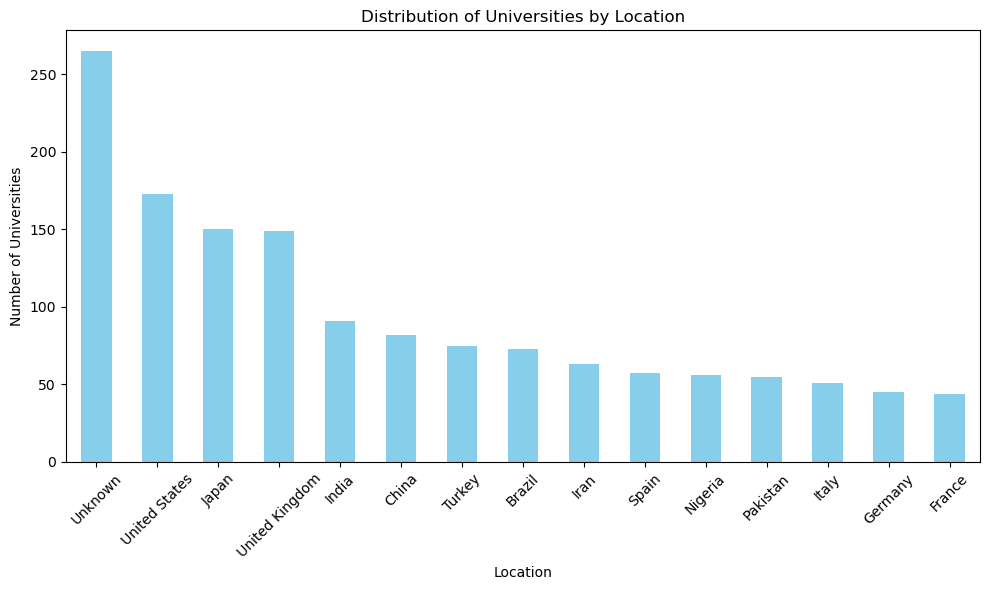

In [94]:
# Count the number of universities in each location
location_counts = df['Location'].value_counts().head(15)

# Plot the distribution of universities by location
plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Universities by Location')
plt.xlabel('Location')
plt.ylabel('Number of Universities')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Correlation between various scores (e.g., teaching and research).
Gender distribution across universities.
Distribution of international students across universities.